In [6]:
pip skfuzzy


ERROR: unknown command "skfuzzy"


In [7]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


204.00000000000003


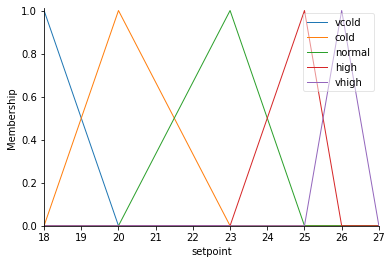

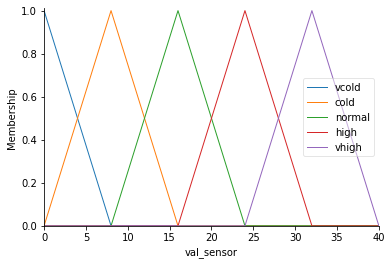

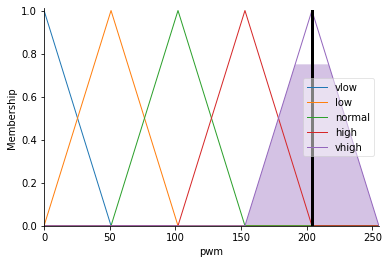

In [8]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

setpoint = ctrl.Antecedent(np.arange(18,28,1),'setpoint')
val_sensor = ctrl.Antecedent(np.arange(0,41,1),'val_sensor')
pwm = ctrl.Consequent(np.arange(0,256,1),'pwm')
Hz = ctrl.Consequent(np.arange(0,61,1),'Hz')

setpoint['vcold'] = fuzz.trimf(setpoint.universe,[18,18,20])
setpoint['cold'] = fuzz.trimf(setpoint.universe,[18,20,23])
setpoint['normal']  = fuzz.trimf(setpoint.universe,[20,23,25])
setpoint['high']  = fuzz.trimf(setpoint.universe,[23,25,26])
setpoint['vhigh']  = fuzz.trimf(setpoint.universe,[25,26,27])


val_sensor['vcold'] = fuzz.trimf(val_sensor.universe,[0,0,8])
val_sensor['cold'] = fuzz.trimf(val_sensor.universe,[0,8,16])
val_sensor['normal']  = fuzz.trimf(val_sensor.universe,[8,16,24])
val_sensor['high']  = fuzz.trimf(val_sensor.universe,[16,24,32])
val_sensor['vhigh']  = fuzz.trimf(val_sensor.universe,[24,32,40])


pwm['vlow'] = fuzz.trimf(pwm.universe,[0,0,51])
pwm['low'] = fuzz.trimf(pwm.universe,[0,51,102])
pwm['normal']  = fuzz.trimf(pwm.universe,[51,102,153])
pwm['high']  = fuzz.trimf(pwm.universe,[102,153,204])
pwm['vhigh']  = fuzz.trimf(pwm.universe,[153,204,255])

Hz['vlow'] = fuzz.trimf(Hz.universe,[0,0,12])
Hz['low'] = fuzz.trimf(Hz.universe,[0,12,24])
Hz['normal']  = fuzz.trimf(Hz.universe,[12,24,36])
Hz['high']  = fuzz.trimf(Hz.universe,[24,36,48])
Hz['vhigh']  = fuzz.trimf(Hz.universe,[36,48,60])

setpoint.view()
val_sensor.view()
rule1= ctrl.Rule(setpoint['vcold'] & val_sensor['vcold'],pwm['vlow'])

rule2= ctrl.Rule(setpoint['vcold']& val_sensor['cold'],pwm['low'])
rule3= ctrl.Rule(setpoint['vcold']& val_sensor['normal'],pwm['high'])
rule4= ctrl.Rule(setpoint['vcold']& val_sensor['high'],pwm['vhigh'])
rule5= ctrl.Rule(setpoint['vcold']& val_sensor['vhigh'],pwm['vhigh'])


rule6= ctrl.Rule(setpoint['cold']& val_sensor['vcold'],pwm['low'])
rule7= ctrl.Rule(setpoint['cold']& val_sensor['cold'],pwm['vlow'])
rule8= ctrl.Rule(setpoint['cold']& val_sensor['normal'],pwm['low'])
rule9= ctrl.Rule(setpoint['cold']& val_sensor['high'],pwm['high'])
rule10= ctrl.Rule(setpoint['cold']& val_sensor['vhigh'],pwm['vhigh'])


rule11= ctrl.Rule(setpoint['normal']& val_sensor['vcold'],pwm['vhigh'])
rule12= ctrl.Rule(setpoint['normal']& val_sensor['cold'],pwm['high'])
rule13= ctrl.Rule(setpoint['normal']& val_sensor['normal'],pwm['normal'])
rule14= ctrl.Rule(setpoint['normal']& val_sensor['high'],pwm['low'])
rule15= ctrl.Rule(setpoint['normal']& val_sensor['vhigh'],pwm['vlow'])


rule16= ctrl.Rule(setpoint['high']& val_sensor['vcold'],pwm['vhigh'])
rule17= ctrl.Rule(setpoint['high']& val_sensor['cold'],pwm['high'])
rule18= ctrl.Rule(setpoint['high']& val_sensor['normal'],pwm['high'])
rule19= ctrl.Rule(setpoint['high']& val_sensor['high'],pwm['low'])
rule20= ctrl.Rule(setpoint['high']& val_sensor['vhigh'],pwm['vlow'])

rule21= ctrl.Rule(setpoint['vhigh']& val_sensor['vcold'],pwm['vhigh'])
rule22= ctrl.Rule(setpoint['vhigh']& val_sensor['cold'],pwm['vhigh'])
rule23= ctrl.Rule(setpoint['vhigh']& val_sensor['normal'],pwm['vhigh'])
rule24= ctrl.Rule(setpoint['vhigh']& val_sensor['high'],pwm['high'])
rule25= ctrl.Rule(setpoint['vhigh']& val_sensor['vhigh'],pwm['normal'])
rule23= ctrl.Rule(setpoint['vhigh']& val_sensor['normal'],pwm['vhigh'])
rule24= ctrl.Rule(setpoint['vhigh']& val_sensor['high'],pwm['high'])
rule25= ctrl.Rule(setpoint['vhigh']& val_sensor['vhigh'],pwm['normal'])

temperature = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,
                               rule7,rule8,rule9,
                               rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])

temperature = ctrl.ControlSystemSimulation(temperature)
temperature.input['setpoint']= 15
temperature.input['val_sensor']= 30
temperature.compute()
print(temperature.output['pwm'])
pwm.view(sim = temperature)